Enter a string: The environment is the basic life support system for all living things on planet Earth. It is a combination of natural and human-made components. Natural components include air, water, land and living organisms. Roads, industries, buildings, etc., are human-made components. The natural environment can be differentiated into four main components – Biosphere, Lithosphere, Hydrosphere and Atmosphere. The topmost layer of the Earth is called the Lithosphere, which is a thin layer of soil made of rocks and minerals. The hydrosphere consists of various types of water bodies like seas, oceans, rivers, lakes, ponds, etc. Atmosphere, consisting of water vapour, gases and dust particles, is the layer of air that surrounds the Earth. The living world consisting of human beings, plants and animals constitute the biosphere.
Total finger travel distance: 970.3263954683597
Best layout found with distance: 389.98540446292265


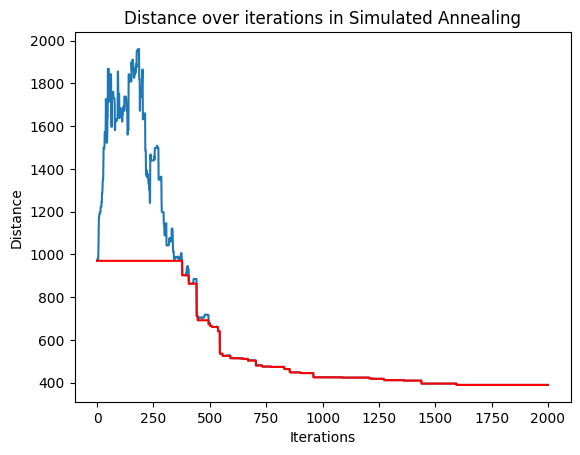


Initial and Optimized Layouts:


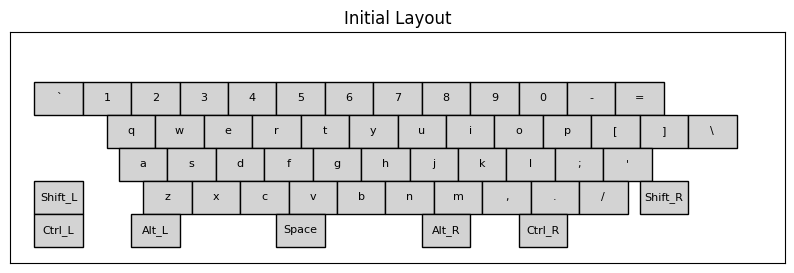

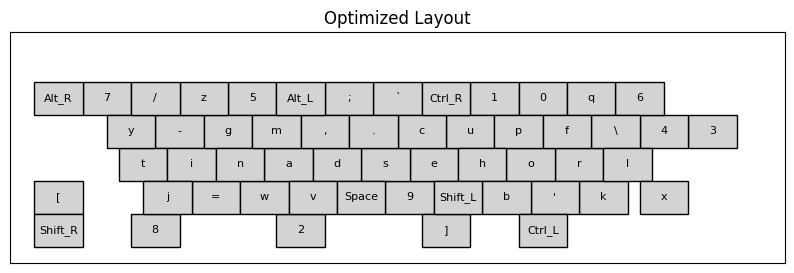

In [15]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib import patches

# QWERTY Keyboard layout data
keys = {
    # Number row
    '`': {'pos': (0, 4)},
    '1': {'pos': (1, 4)},
    '2': {'pos': (2, 4)},
    '3': {'pos': (3, 4)},
    '4': {'pos': (4, 4)},
    '5': {'pos': (5, 4)},
    '6': {'pos': (6, 4)},
    '7': {'pos': (7, 4)},
    '8': {'pos': (8, 4)},
    '9': {'pos': (9, 4)},
    '0': {'pos': (10, 4)},
    '-': {'pos': (11, 4)},
    '=': {'pos': (12, 4)},

    # Top letter row
    'q': {'pos': (1.5, 3)},
    'w': {'pos': (2.5, 3)},
    'e': {'pos': (3.5, 3)},
    'r': {'pos': (4.5, 3)},
    't': {'pos': (5.5, 3)},
    'y': {'pos': (6.5, 3)},
    'u': {'pos': (7.5, 3)},
    'i': {'pos': (8.5, 3)},
    'o': {'pos': (9.5, 3)},
    'p': {'pos': (10.5, 3)},
    '[': {'pos': (11.5, 3)},
    ']': {'pos': (12.5, 3)},
    '\\': {'pos': (13.5, 3)},

    # Home row
    'a': {'pos': (1.75, 2)},
    's': {'pos': (2.75, 2)},
    'd': {'pos': (3.75, 2)},
    'f': {'pos': (4.75, 2)},
    'g': {'pos': (5.75, 2)},
    'h': {'pos': (6.75, 2)},
    'j': {'pos': (7.75, 2)},
    'k': {'pos': (8.75, 2)},
    'l': {'pos': (9.75, 2)},
    ';': {'pos': (10.75, 2)},
    "'": {'pos': (11.75, 2)},

    # Bottom letter row
    'z': {'pos': (2.25, 1)},
    'x': {'pos': (3.25, 1)},
    'c': {'pos': (4.25, 1)},
    'v': {'pos': (5.25, 1)},
    'b': {'pos': (6.25, 1)},
    'n': {'pos': (7.25, 1)},
    'm': {'pos': (8.25, 1)},
    ',': {'pos': (9.25, 1)},
    '.': {'pos': (10.25, 1)},
    '/': {'pos': (11.25, 1)},

    # Special keys
    'Shift_L': {'pos': (0, 1)},
    'Shift_R': {'pos': (12.5, 1)},
    'Ctrl_L': {'pos': (0, 0)},
    'Alt_L': {'pos': (2, 0)},
    'Space': {'pos': (5, 0)},
    'Alt_R': {'pos': (8, 0)},
    'Ctrl_R': {'pos': (10, 0)},
}

'''
    Function to find Euclidien distance between two points given as tuples and return it.
'''
def calculate_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


'''
    considering that the finger returns to home keys after pressing each letter on the keyboard, so for this coordinates of homerow keys are fixed.
'''

home_row_positions = [
    keys['a']['pos'],  # (1.75, 2)
    keys['s']['pos'],  # (2.75, 2)
    keys['d']['pos'],  # (3.75, 2)
    keys['f']['pos'],  # (4.75, 2)
    keys['g']['pos'],  # (5.75, 2)
    keys['h']['pos'],  # (6.75, 2)
    keys['j']['pos'],  # (7.75, 2)
    keys['k']['pos'],  # (8.75, 2)
    keys['l']['pos'],  # (9.75, 2)
    keys[';']['pos'],  # (10.75, 2)
]

'''
find_nearest_home_key:
    This function compares the position of a character key on the keyboard with the positions of home row keys to find the closest one.
    For calculating finger travel distance, it is assumed that the finger on the home key nearest to the input character moves to press it.
    So this function returns the coordinated of the nearest home key and the distance.
'''

def find_nearest_home_key(char_position):
    min_distance = float('inf')
    nearest_home_position = None

    for home_position in home_row_positions:
        distance = calculate_distance(home_position, char_position)
        if distance < min_distance:
            min_distance = distance
            nearest_home_position = home_position

    return nearest_home_position, min_distance

'''
calculate_total_distance:
    This function calculates the overall distance the fingers need to travel to type a given string based on the current keyboard layout.
    It considers how often each character appears and their distances from home row keys.
'''
def calculate_total_distance(layout, input_dict):
    total_distance = 0.0

    for char, count in input_dict.items():
        if char in layout:
            char_position = layout[char]['pos']
            nearest_home_position, distance = find_nearest_home_key(char_position)
            total_distance += distance * count

    return total_distance * 2


sample_text = input('Enter a string: ')
input_dictionary = {}

for char in sample_text:
    input_dictionary[char] = input_dictionary.get(char, 0) + 1


total_distance = calculate_total_distance(keys, input_dictionary)
print("Total finger travel distance:", total_distance)


'''
Simulated annealing:

    -Copies the initial layout to current_layout.
    -Calculates the initial distance using calculate_total_distance().
    -Sets best_layout and best_distance to track the best found layout.
    -Initializes distances list to store distances for each iteration.
    -Sets the initial temperature to initial_temp.

    -Runs for max_iterations.

    -Creates a new layout by randomly swapping two keys from the current layout.
    -Uses random.sample() to select two different keys to swap
    -Calculates new_distance for the new layout.

    -Checks if new_distance is less than current_distance:
    -If yes, accepts the new layout.
    -If no, accepts the new layout with a probability based on the temperature and distance difference (using the Boltzmann distribution).

    -Updates best_layout and best_distance if the new distance is the best found
    -Appends current_distance to the distances list.

    -Decreases temperature by multiplying it with cooling_rate.
    -Returns best_layout, best_distance, and the list of distances for analysis.
'''


def simulated_annealing(layout, initial_temp, cooling_rate, max_iterations):
    current_layout = layout.copy()
    current_distance = calculate_total_distance(current_layout, input_dictionary)
    best_layout = current_layout.copy()
    best_distance = current_distance

    distances = [current_distance]
    temperature = initial_temp

    for iteration in range(max_iterations):
        new_layout = current_layout.copy()

        keys_list = list(new_layout.keys())
        key1, key2 = random.sample(keys_list, 2)

        new_layout[key1], new_layout[key2] = new_layout[key2], new_layout[key1]

        new_distance = calculate_total_distance(new_layout, input_dictionary)

        if new_distance < current_distance or random.uniform(0, 1) < math.exp((current_distance - new_distance) / temperature):
            current_layout = new_layout
            current_distance = new_distance

            if current_distance < best_distance:
                best_layout = current_layout.copy()
                best_distance = current_distance

        distances.append(current_distance)
        temperature *= cooling_rate

    return best_layout, best_distance, distances


initial_temp = 1000
cooling_rate = 0.99
max_iterations = 2000

best_layout, best_distance, distance_log = simulated_annealing(keys, initial_temp, cooling_rate, max_iterations)


print("Best layout found with distance:", best_distance)

'''
    It plots the total distance over each iteration on the x-axis and the corresponding distance on the y-axis.
    It overlays a red line that tracks the minimum distance found at each iteration, representing the best layout achieved so far
'''

plt.plot(distance_log)
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.plot([min(distance_log[:i+1]) for i in range(len(distance_log))], color='red', label='Best Distance')
plt.title('Distance over iterations in Simulated Annealing')
plt.show()


'''
    Plot the keyboard layout using matplotlib.

    This function visually represents the keyboard layout using matplotlib, making it easy to compare the initial and optimized layouts.
    Each key's position is plotted as a rectangle, with the key label displayed.
'''


def plot_keyboard(layout, title):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 6)
    ax.set_xticks([])
    ax.set_yticks([])

    for key, info in layout.items():
        pos = info['pos']
        rect = patches.Rectangle((pos[0] - 0.5, pos[1] - 0.5), 1, 1, edgecolor='black', facecolor='lightgray')
        ax.add_patch(rect)
        ax.text(pos[0], pos[1], key, ha='center', va='center', fontsize=8)

    ax.set_title(title)
    plt.show()

print("\nInitial and Optimized Layouts:")
plot_keyboard(keys, "Initial Layout")
plot_keyboard(best_layout, "Optimized Layout")